# Content

1. [Import Libraries](#1)
1. [A/B Testing Implementation](#2)
1. [Fast Food Marketing Compaign A/B Testing](#3)
1. [Mobile Games A/B Testing](#4)

<a id = "1"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Import Libraries✨</p>

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

<a id = "2"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨A/B Testing Implementation✨</p>

In [2]:
df = pd.read_csv("/kaggle/input/ab-test-data/AB_Test_Results.csv")

In [3]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>👀 Notes: </font></h3>
  
* **USER_ID**: Identification number
* **VARIANT_NAME**: Group membership
* **REVENUE**: Income

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,10000.0,4981.080200,2890.590115,2.0,2468.75,4962.0,7511.5,10000.00
REVENUE,10000.0,0.099447,2.318529,0.0,0.00,0.0,0.0,196.01


In [5]:
df.sort_values(by="REVENUE", ascending=False).head(15)

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
6447,2881,variant,58.63
7642,7206,variant,57.46
9421,6792,control,41.53
8168,2166,control,29.32
9125,831,control,25.98
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56


In [6]:
df.duplicated().sum() # checked duplicated rows

2067

In [7]:
df.drop_duplicates(inplace=True) # dropped duplicated rows

<Axes: xlabel='REVENUE', ylabel='Density'>

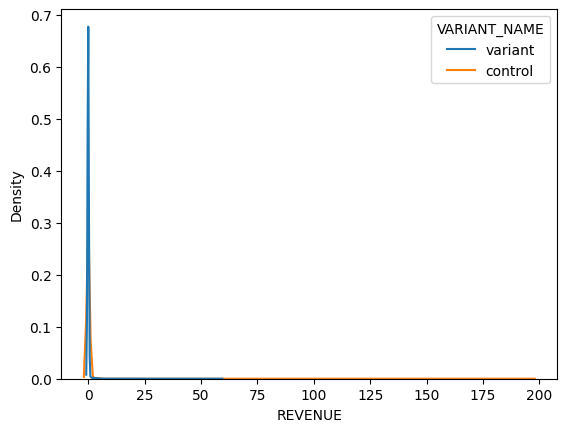

In [8]:
sns.kdeplot(x="REVENUE", data = df, hue = "VARIANT_NAME") # checked normall distribition

In [9]:
control = df[df["VARIANT_NAME"]=="control"]
variant = df[df["VARIANT_NAME"]=="variant"]

In [10]:
control.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,3973.0,4988.320664,2895.606855,2.0,2474.0,4971.0,7572.0,10000.00
REVENUE,3973.0,0.161842,3.367815,0.0,0.0,0.0,0.0,196.01


In [11]:
variant.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,3960.0,4965.412374,2889.255440,3.0,2442.75,4958.5,7425.0,10000.00
REVENUE,3960.0,0.088755,1.479239,0.0,0.00,0.0,0.0,58.63


> **Hypothesis Testing**

In [12]:
control["REVENUE"].mean()

0.16184243644601057

In [13]:
variant["REVENUE"].mean()

0.08875505050505052

<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>👀 Notes: </font></h3>
    
According to these numbers, it seems like there may be a difference in revenue between the groups, but this difference could have occurred by chance and should be statistically tested.

**Step 1 - Formulate Hypotheses:**
   - Null Hypothesis (H0): μ1 = μ2 (There is no statistical difference in terms of revenue between the Control and Variant Groups)
   - Alternative Hypothesis (H1): μ1 ≠ μ2 (There is a statistical difference between the Control and Variant Groups in terms of revenue)

**Step 2 - Assumption Checks:**
   - Normality Assumption
   - Homogeneity of Variance

**Step 3 - Normality Assumption Hypothesis:**
   - H0: The normal distribution assumption is met.
   - H1: The normal distribution assumption is not met.
    
**Step 4 - Assumption of Homogeneity of Variance:**
   - H0: Variances are homogenous.
   - H1: Variances are not homogenous.

> **Normality Assumption**

In [14]:
test_stat, pvalue = shapiro(control["REVENUE"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0220, p-value = 0.0000


In [15]:
test_stat, pvalue = shapiro(variant["REVENUE"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0327, p-value = 0.0000


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>👀 Notes: </font></h3>
    
* "H0 has been rejected. It does not exhibit a normal distribution. 
* Therefore, there is no need to check for homogeneity of variances. We can proceed directly to non-parametric statistical analysis, which is the **Mann-Whitney test.**"

> **Non-parametric Test**

In [16]:
test_stat, pvalue = mannwhitneyu(control["REVENUE"],variant["REVENUE"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# According to the Mann-Whitney U test, H0 cannot be rejected. There is no significant difference between the means of the two groups.

Test Stat = 7882388.0000, p-value = 0.5129


<a id = "3"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Fast Food Marketing Compaign A/B Testing✨</p>

In [17]:
fast_food = pd.read_csv("/kaggle/input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")

In [18]:
fast_food.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* **MarketID**: unique identifier for market
* **MarketSize**: size of market area by sales
* **LocationID**: unique identifier for store location
* **AgeOfStore**: age of store in years
* **Promotion**: one of three promotions that were tested
* **week**: one of four weeks when the promotions were run
* **SalesInThousands**: sales amount for a specific LocationID, Promotion, and week

In [19]:
fast_food["Promotion"].value_counts()

Promotion
3    188
2    188
1    172
Name: count, dtype: int64

In [20]:
promotion1 = fast_food[fast_food["Promotion"]=="1"]
promotion2 = fast_food[fast_food["Promotion"]=="2"]
promotion3 = fast_food[fast_food["Promotion"]=="3"]

> **Hypothesis Testing**

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
According to these numbers, it seems like there may be a difference in promotion types, but this difference could have occurred by chance and should be statistically tested.

**Step 1 - Formulate Hypotheses:**
   - Null Hypothesis (H0): μ1 = μ2 = μ3 (There is no statistical difference in terms of promotion types.)
   - Alternative Hypothesis (H1): At least one group is different from the others.

**Step 2 - Assumption Checks:**
   - Normality Assumption
   - Homogeneity of Variance

**Step 3 - Normality Assumption Hypothesis:**
   - H0: The normal distribution assumption is met.
   - H1: The normal distribution assumption is not met.
    
**Step 4 - Assumption of Homogeneity of Variance:**
   - H0: Variances are homogenous.
   - H1: Variances are not homogenous.

> **Normality Assumption**

In [21]:
for group in list(fast_food["Promotion"].unique()):
    
    pvalue = shapiro(fast_food.loc[fast_food["Promotion"] == group, "SalesInThousands"])[1]
    
    print(group, 'p-value: %.4f' % pvalue)

3 p-value: 0.0000
2 p-value: 0.0000
1 p-value: 0.0000


<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* "H0 has been rejected. It does not exhibit a normal distribution.
* Therefore, there is no need to check for homogeneity of variances. We can proceed directly to non-parametric statistical analysis, which is the **Kruskal Test.**

> **Non-parametric Test**

In [22]:
s,p = kruskal(fast_food.loc[fast_food["Promotion"] == 1, "SalesInThousands"],
        fast_food.loc[fast_food["Promotion"] == 2, "SalesInThousands"],
        fast_food.loc[fast_food["Promotion"] == 3, "SalesInThousands"])

print(f"\nStatistic: {s:.3f}\np-Value: {p:.3f}\n")

# The p-value for the hypothesis of equality of promotions is less than 0.05; therefore, we reject the null hypothesis, indicating that the assumption of equality is not satisfied.


Statistic: 53.295
p-Value: 0.000



<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* The p-value for the hypothesis of equality of promotions is less than 0.05; therefore, we reject the null hypothesis, indicating that the assumption of equality is not satisfied.
* In Addition to this, we can check the  difference amoung beetwen these groups in below.

In [23]:
from statsmodels.stats.multicomp import MultiComparison

comparison = MultiComparison(fast_food['SalesInThousands'], fast_food['Promotion'])
tukey = comparison.tukeyhsd(0.05)

print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>

* As observed, we cannot reject the similarity between 1 and 3, a difference was found between 1 and 3.

<a id = "4"></a><br>
<p style="font-family: 'Pacifico', cursive; font-weight: bold; letter-spacing: 2px; color: #556B2F; font-size: 160%; text-align: left; padding: 0px; border-bottom: 3px solid">✨Mobile Games A/B Testing✨</p>

In [24]:
mob = pd.read_csv("/kaggle/input/mobile-games-ab-testing/cookie_cats.csv")

In [25]:
mob.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
- **userid:** Unique identifier for each user.
- **version:** The version of the game (e.g., Gate_30 or Gate_40).
- **sum_gamerounds:** The total number of game rounds played by the user.
- **retention_1:** Whether the user retained after 1 day from installation (binary: 1 for retained, 0 for not retained).
- **retention_7:** Whether the user retained after 7 days from installation (binary: 1 for retained, 0 for not retained).

In [26]:
mob.shape

(90189, 5)

In [27]:
mob.duplicated().sum()

0

In [28]:
sms.DescrStatsW(mob["sum_gamerounds"]).tconfint_mean() # we checked confidience intervals before sampling

(50.59946671311376, 53.14544674639904)

In [29]:
sample = mob.sample(n=5000, random_state=42)

sample["sum_gamerounds"].mean()

51.9722

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>

* The Shapiro-Wilk test requires the sample size to be less than 5000. Therefore, for each unique value of the 'version,' we selected 2500 sample units, assigning n=5000.
* We can use the sample mean because it falls within the confidence interval of our entire dataset.

> **Hypothesis Testing**

In [30]:
sample.groupby('version').agg({"sum_gamerounds": ["count", "mean"]})

sum_gamerounds           
                 count       mean
version                          
gate_30           2503  52.296444
gate_40           2497  51.647177

<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
According to these numbers, it seems like there may be a difference in game rounds, but this difference could have occurred by chance and should be statistically tested.

**Step 1 - Formulate Hypotheses:**
   - Null Hypothesis (H0): μ1 = μ2 (There is no statistical difference in terms of game rounds between the versions)
   - Alternative Hypothesis (H1): μ1 ≠ μ2 (There is statistical difference in terms of game rounds between the versions)

**Step 2 - Assumption Checks:**
   - Normality Assumption
   - Homogeneity of Variance

**Step 3 - Normality Assumption Hypothesis:**
   - H0: The normal distribution assumption is met.
   - H1: The normal distribution assumption is not met.
    
**Step 4 - Assumption of Homogeneity of Variance:**
   - H0: Variances are homogenous.
   - H1: Variances are not homogenous.

> **Normality Assumption**

In [31]:
for gate in sample["version"].unique():
    
    s,p = shapiro(sample.loc[sample['version'] == gate,"sum_gamerounds"])
    
    print(f"Version: {gate} \nStatistic: {s:.3f}\np-Value: {p:.3f}\n")

Version: gate_30 
Statistic: 0.468
p-Value: 0.000

Version: gate_40 
Statistic: 0.494
p-Value: 0.000



<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>
    
* "H0 has been rejected. It does not exhibit a normal distribution. 
* Therefore, there is no need to check for homogeneity of variances. We can proceed directly to non-parametric statistical analysis, which is the **Mann-Whitney test.**".

> **Non-parametric Test**

In [32]:
s,p = mannwhitneyu(sample.loc[sample['version']=="gate_30","sum_gamerounds"],
             sample.loc[sample['version']=="gate_40","sum_gamerounds"])

print(f"\nStatistic: {s:.3f}\np-Value: {p:.3f}\n")


Statistic: 3120414.500
p-Value: 0.928



<div style="border-radius:10px; border:#65647C solid; padding: 15px; background-color: #F8EDE3; font-size:100%; text-align:left">

<h3 align="left"><font color='#7D6E83'><b>🗨️ Comment: </b></font></h3>

* According to the Mann-Whitney U test, H0 cannot be rejected. There is no significant difference between the means of the two groups.